[codebasics](https://www.youtube.com/watch?v=KfnhNlD8WZI&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=5)

In [1]:
%matplotlib inline

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


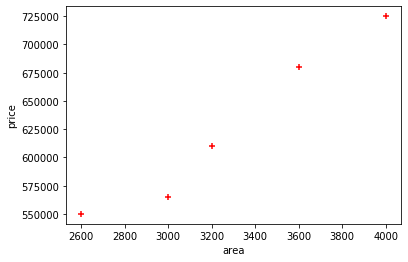

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('data/homeprices.csv')
print(df)

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.show()

   area   price     price_pred
0  2600  550000  533664.383562
1  3000  565000  587979.452055
2  3200  610000  615136.986301
3  3600  680000  669452.054795
4  4000  725000  723767.123288


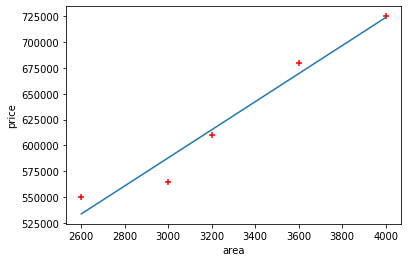

In [3]:
reg = linear_model.LinearRegression()
# reg.fit(df.area, df.price) # ValueError: Expected 2D array, got 1D array instead:
reg.fit(np.array(df.area).reshape((-1, 1)), df.price)
price_pred = reg.predict(np.array(df.area).reshape((-1, 1)))
df['price_pred'] = price_pred
# df.price_pred = price_pred # this is not what I want
print(df)

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, df.price_pred)
plt.show()

In [4]:
x = [[3300]]
y_hat = reg.predict(x)
print(y_hat)

#y_hat2 = reg.coef_ * x + reg.intercept_
y_hat2 = (reg.coef_ * x + reg.intercept_).reshape(-1)  
print(reg.coef_)
print(reg.intercept_)
print(y_hat2)

[628715.75342466]
[135.78767123]
180616.43835616432
[628715.75342466]


In [5]:
x = [[3300], 
     [4400]]
y_hat = reg.predict(x)
print(y_hat)

y_hat2 = (reg.coef_ * x + reg.intercept_).reshape(-1) 
print(reg.coef_)
print(reg.intercept_)
print(y_hat2)

[628715.75342466 778082.19178082]
[135.78767123]
180616.43835616432
[628715.75342466 778082.19178082]


# save as csv

   area   price     price_pred
0  2600  550000  533664.383562
1  3000  565000  587979.452055
2  3200  610000  615136.986301
3  3600  680000  669452.054795
4  4000  725000  723767.123288


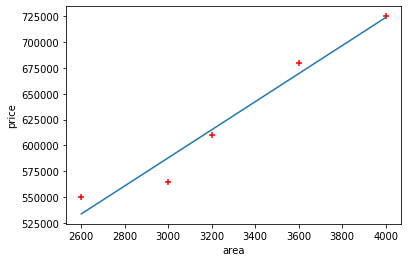

In [6]:
df.to_csv("data/homeprices_with_prediction.csv", index=False)

df = pd.read_csv('data/homeprices_with_prediction.csv')
print(df)

plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, df.price_pred)
plt.show()

# save using pickle

In [7]:
import pickle
import os

if not os.path.isdir('model'):
    os.mkdir('model')

with open('model/linear_regression_model_pickle', 'wb') as f:
    pickle.dump(reg, f)
    
with open('model/linear_regression_model_pickle', 'rb') as g:
    reg_p = pickle.load(g)
    
x = [[3300], 
     [4400]]
y_hat = reg_p.predict(x)
print(y_hat)

[628715.75342466 778082.19178082]


# save using joblib

In [8]:
from sklearn.externals import joblib

if not os.path.isdir('model'):
    os.mkdir('model')

joblib.dump(reg, 'model/linear_regression_model_joblib')
reg_j = joblib.load('model/linear_regression_model_joblib')
    
x = [[3300], 
     [4400]]
y_hat = reg_j.predict(x)
print(y_hat)

[628715.75342466 778082.19178082]


/Users/sungchul/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
